# DES

DES (Data Encryption Standard) was devolped by IBM due to a propose from National Bereau of Standard (NBS, today NIST). 

IBM developed Lucifer, cipher on 128-bit data blocks with 128-bit key, then it was revised due to requirement design: 64-bit blocks with 54-bit key (DES).

DES is a block cipher based on Feister Structure, it was among the first public cipher, in according to Kerckhoffs's principle. 

Nevertheless, some specific design were not explained, e.g choice of 56-bit key, round function design, ect...

Note: DES is designed to be implemented in hardware.

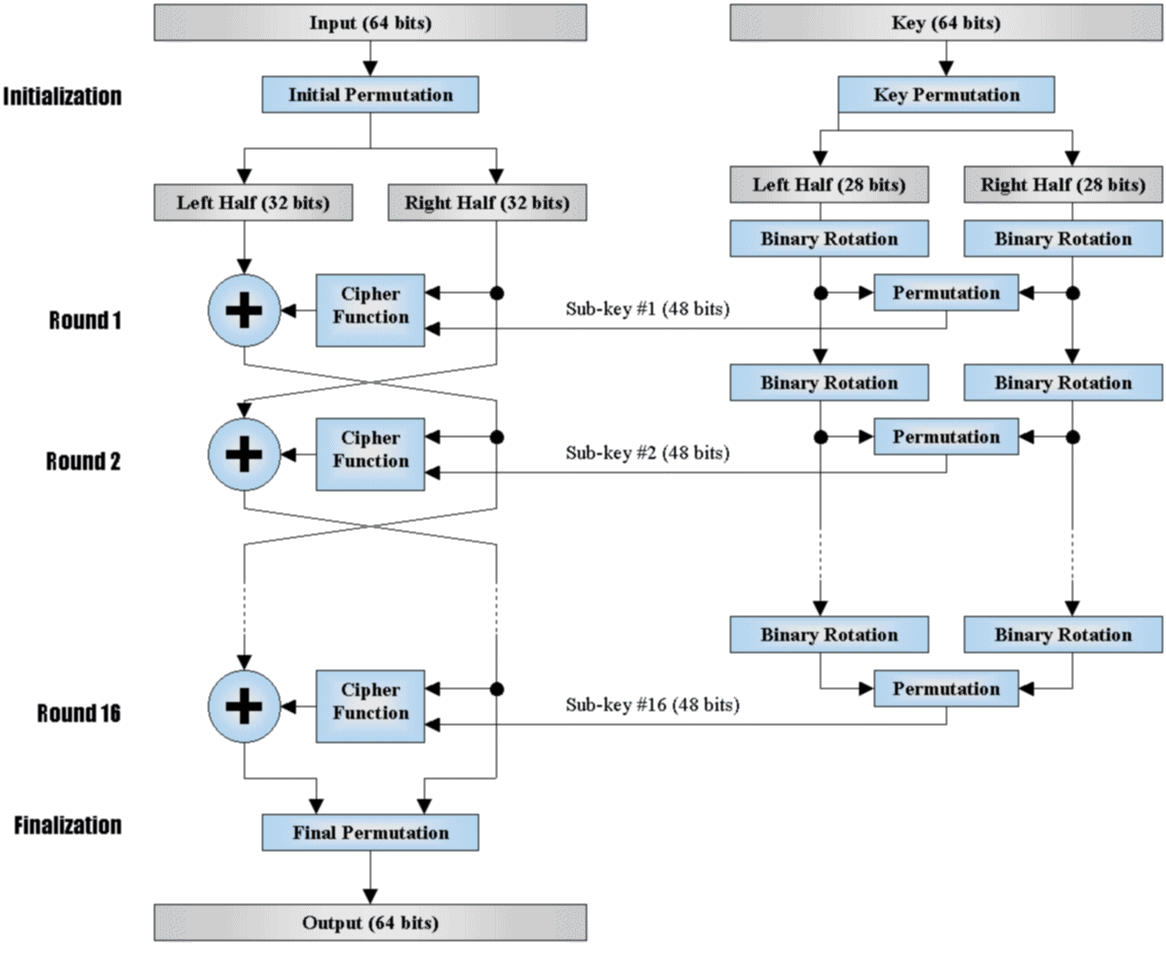



## Initial Permutation (IP) and Final Permutation (FP)

First step of data computation is an initial permutation, that reorders input data bits:

- Even bits: compose left half block;
- Odd bits: compose right half block;

With a quite regular structure, easily implementable in hardware.

Last step of DES algorithm is inverse IP with an inverse Matrix.

This permutation increase **diffusion**, destroying statistical structure on bi-grams.

### IP and FP Matrix



In [ ]:
#Initial permutation matrix for the datas
IP = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17,  9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

#Final permutation matrix for datas
FP = [40, 8, 48, 16, 56, 24, 64, 32,
      39, 7, 47, 15, 55, 23, 63, 31,
      38, 6, 46, 14, 54, 22, 62, 30,
      37, 5, 45, 13, 53, 21, 61, 29,
      36, 4, 44, 12, 52, 20, 60, 28,
      35, 3, 43, 11, 51, 19, 59, 27,
      34, 2, 42, 10, 50, 18, 58, 26,
      33, 1, 41,  9, 49, 17, 57, 25]

## DES Round Structure

In according to Feistel Structure, DES use two 32-bit halves:

```python
L[i] = R[i-1]
R[i] = L[i] ^ F(R[i-1], K[i])
```

So it's needed to descript F round function,that takes 32-bit right half and 48-bit subkey:

1. Expands R to 48-bit using permutation matrix E
2. (Extended Right Half) XOR (SubKey)
3. Apply 8 S-boxes to get 32-bit result
4. Apply permutation matrix P

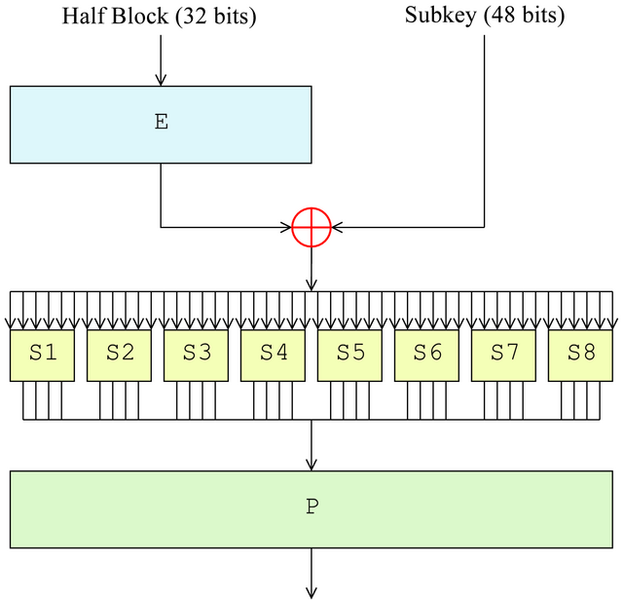


### Expansion and permutation



In [ ]:
#Expansion matrix to get a 48bits matrix of datas to apply the xor with subkey
E = [32, 1,  2,  3,  4,  5,
      4, 5,  6,  7,  8,  9,
      8, 9, 10, 11, 12, 13,
     12, 13, 14, 15, 16, 17,
     16, 17, 18, 19, 20, 21,
     20, 21, 22, 23, 24, 25,
     24, 25, 26, 27, 28, 29,
     28, 29, 30, 31, 32,  1]

#Permutation matrix after each SBox substitution for each round
P = [16,  7, 20, 21, 29, 12, 28, 17,
      1, 15, 23, 26,  5, 18, 31, 10,
      2,  8, 24, 14, 32, 27,  3,  9,
     19, 13, 30,  6, 22, 11,  4, 25]

Note:
Expansion matrix is not a square matrix, and it's not a symmetric matrix in order to alterate statistical structure (*diffusion*).

Round functions doesn't need to be invertible due to Feinstel Structure (AWESOME!!!) .


### S-Boxes

DES use 8 S-boxes, which each map 6 to 4 bits. Each S-Box is organized in 4 little 4 bit boxes:

- Outer bits (1 & 6) select one row of 4
- Inner bits (2 - 5) select one column of 16

Six bit inputs map an entry of S_Box, that is 4-bit output.

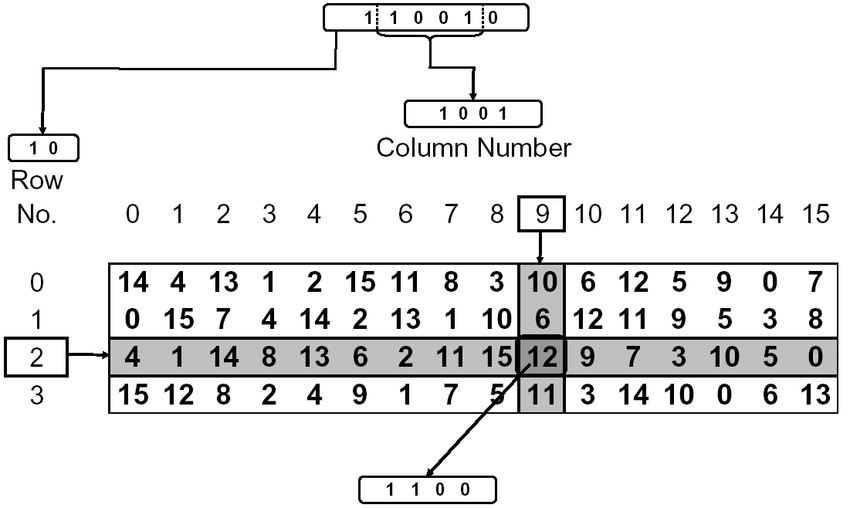



In [1]:
#SBOX
S_BOX = [
         
[[14,  4, 13,  1,  2, 15, 11,  8,  3, 10,  6, 12,  5,  9,  0,  7],
 [ 0, 15,  7,  4, 14,  2, 13,  1, 10,  6, 12, 11,  9,  5,  3,  8],
 [ 4,  1, 14,  8, 13,  6,  2, 11, 15, 12,  9,  7,  3, 10,  5,  0],
 [15, 12,  8,  2,  4,  9,  1,  7,  5, 11,  3, 14, 10,  0,  6, 13],
],

[[15,  1,  8, 14,  6, 11,  3,  4,  9,  7,  2, 13, 12,  0,  5, 10],
 [ 3, 13,  4,  7, 15,  2,  8, 14, 12,  0,  1, 10,  6,  9, 11,  5],
 [ 0, 14,  7, 11, 10,  4, 13,  1,  5,  8, 12,  6,  9,  3,  2, 15],
 [13,  8, 10,  1,  3, 15,  4,  2, 11,  6,  7, 12,  0,  5, 14,  9],
],

[[10,  0,  9, 14,  6,  3, 15,  5,  1, 13, 12,  7, 11,  4,  2,  8],
 [13,  7,  0,  9,  3,  4,  6, 10,  2,  8,  5, 14, 12, 11, 15,  1],
 [13,  6,  4,  9,  8, 15,  3,  0, 11,  1,  2, 12,  5, 10, 14,  7],
 [ 1, 10, 13,  0,  6,  9,  8,  7,  4, 15, 14,  3, 11,  5,  2, 12],
],

[[ 7, 13, 14,  3,  0,  6,  9, 10,  1,  2,  8,  5, 11, 12,  4, 15],
 [13,  8, 11,  5,  6, 15,  0,  3,  4,  7,  2, 12,  1, 10, 14,  9],
 [10,  6,  9,  0, 12, 11,  7, 13, 15,  1,  3, 14,  5,  2,  8,  4],
 [ 3, 15,  0,  6, 10,  1, 13,  8,  9,  4,  5, 11, 12,  7,  2, 14],
],  

[[ 2, 12,  4,  1,  7, 10, 11,  6,  8,  5,  3, 15, 13,  0, 14,  9],
 [14, 11,  2, 12,  4,  7, 13,  1,  5,  0, 15, 10,  3,  9,  8,  6],
 [ 4,  2,  1, 11, 10, 13,  7,  8, 15,  9, 12,  5,  6,  3,  0, 14],
 [11,  8, 12,  7,  1, 14,  2, 13,  6, 15,  0,  9, 10,  4,  5,  3],
], 

[[12,  1, 10, 15,  9,  2,  6,  8,  0, 13,  3,  4, 14,  7,  5, 11],
 [10, 15,  4,  2,  7, 12,  9,  5,  6,  1, 13, 14,  0, 11,  3,  8],
 [ 9, 14, 15,  5,  2,  8, 12,  3,  7,  0,  4, 10,  1, 13, 11,  6],
 [ 4,  3,  2, 12,  9,  5, 15, 10, 11, 14,  1,  7,  6,  0,  8, 13],
], 

[[ 4, 11,  2, 14, 15,  0,  8, 13,  3, 12,  9,  7,  5, 10,  6,  1],
 [13,  0, 11,  7,  4,  9,  1, 10, 14,  3,  5, 12,  2, 15,  8,  6],
 [ 1,  4, 11, 13, 12,  3,  7, 14, 10, 15,  6,  8,  0,  5,  9,  2],
 [ 6, 11, 13,  8,  1,  4, 10,  7,  9,  5,  0, 15, 14,  2,  3, 12],
],
   
[[13,  2,  8,  4,  6, 15, 11,  1, 10,  9,  3, 14,  5,  0, 12,  7],
 [ 1, 15, 13,  8, 10,  3,  7,  4, 12,  5,  6, 11,  0, 14,  9,  2],
 [ 7, 11,  4,  1,  9, 12, 14,  2,  0,  6, 10, 13, 15,  3,  5,  8],
 [ 2,  1, 14,  7,  4, 10,  8, 13, 15, 12,  9,  0,  3,  5,  6, 11],
]
]

### Key Scheduling

DES use a 56-bit key, but today it's used a 64-bit key for common use: 56-bit are used to generate key and 8-bit to check key.

Initial permutation (PC_1) on 64-bit, which selects 56-bits to divide in two 28-bit halves

Key Schedule forms subkeys for each round:

- Shift each half separatelly either 1 or 2 places, depending on cycle index



In [ ]:
SHIFT = [1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1]

- Selecting 24-bit from each half and permuting them by PC_2 to generate a 48-bit subkey

In [ ]:
#Initial permutation made on the key
PC_1 = [57, 49, 41, 33, 25, 17,  9,
         1, 58, 50, 42, 34, 26, 18,
        10,  2, 59, 51, 43, 35, 27,
        19, 11,  3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
         7, 62, 54, 46, 38, 30, 22,
        14,  6, 61, 53, 45, 37, 29,
        21, 13,  5, 28, 20, 12,  4]

#Permutation applied on shifted key to get subkey
PC_2 = [14, 17, 11, 24,  1,  5,  3, 28,
        15,  6, 21, 10, 23, 19, 12,  4,
        26,  8, 16,  7, 27, 20, 13,  2,
        41, 52, 31, 37, 47, 55, 30, 40,
        51, 45, 33, 48, 44, 49, 39, 56,
        34, 53, 46, 42, 50, 36, 29, 32]

### DES Decrypt

In according to Feistel Structure, DES decryption is obtaining throught reverse-ordering of subkeys. 

- Initial Permutation undo Final Permutation step of encryption
- Feistel Decrypt is applied
- Final Permutation undo Initial Permutation step of encryption.

## Crypto-Analysis

As reported by [Coppersmith](https://ieeexplore.ieee.org/document/5389567), DES design is well built:

- 7 Criteria for S-boxes provide:
    - Non-linearity
    - Resistence to differential cryptanalysis
    - Good confusion
- 3 Criteria for permutation provide:
    - Increased diffusion

56-bit keys have $7.2\cdot10^6$ possible values, that looks hard to bruteforce, nevertheless today computing power can bruteforce a DES.

###ADD HISTORY

Today exists some several analytic attacks on DES, generally based on :

- Differiental Cryptanalysis:
    - How difference in plaintext can affect resultant difference in ciphertext
- Linear Cryptoanalysis:
    - Use linear equations relating plaintext, ciphertext and key bits
    - Use linear equations in conjunction with known plaintext-ciphertext pairs to derive key bits
- Related Key Attacks:
    - How difference in keys can affect resultant difference in ciphertext.

### Weak Keys

There are some known keys called *weak keys* that makes the cipher behave in some undesirable way:

$$ E(k,E(k,m)) = m$$

There are some known keys called *semi-weak keys* that makes the cipher behave in some other undesirable way:

$$ E(k_2,E(k_1,m)) = m$$

### Side Channel Attacks

Another type of attacks are side channel attacks. that use knowledge of consequences of implementation to derive information about subkeys bit.

### Timing Attacks

An example is timing attacks, particularly problematic on smartcard. Misuring computing time on different plaintext, can be obtained a relationship between time and plaintext/subkeys.

Mitigation:

In order to mitigate this type attack, could be use a forgery delay.

## 2-DES and 3-DES

In order to strengthen key, could use several time DES.

### 2-DES

Using 2 DES encrypts on each block:

$$ C= E(E(P,k_1),k_2) $$

Resulting key is concat of keys with a double dimension. Nevertheless, a bruteforce attack could be attempted with a reduced complexity of 2 * complexity of DES instead of (complexity of DES)^2 : **Meet-in-the-middle Attack**.

### Meet-in-the-middle Attack

Note:

$$ X = E(P,k_1) = D(C,k_2) $$

If attacker fits into middle then attacker can bruteforce each single DES:

- Encrypt plaintext with all keys and store in a lookup table $(k_1,X)$
- Decrypt ciphertext with all keys and store in a lookup table $(k_2,Y)$
- If $X = Y$ then $k_1+k_2$ is key

### 3-DES

Differently a 3-DES using 2 keys in E-D-E (Encrypt-Decrypt-Encrypt) 

$$ C = E(D(E(P,k_1),k_2),k_1) $$

Using MITM attack, system can be splitted in two parts, one half has $(k_1,k_2)$ and the other $k_1$. Attacking the first half costs $2^{112}$ operations, attacking the second half costs $2^{56}$ operations, i.e. complexity is over $2^{112}$ operations.

Using a 3-DES with a 3-key is not a suitable way, because MITM attack can be successfull with same previous complexity adding overhead (another key) but it has still been adopted in some internet application (PGP, S/MIME)